## Mô tả bộ dữ liệu
- **sex**: 1 cho nữ và 2 cho nam.
- **age**: Tuổi của bệnh nhân.
- **classification**: Kết quả xét nghiệm COVID. Giá trị từ 1-3 nghĩa là bệnh nhân được chẩn đoán mắc COVID ở các mức độ khác nhau. 4 hoặc cao hơn nghĩa là bệnh nhân không mắc COVID hoặc kết quả xét nghiệm không xác định.
- **patient type**: Loại chăm sóc mà bệnh nhân nhận được tại đơn vị. 1 là về nhà và 2 là nhập viện.
- **pneumonia**: Bệnh nhân có viêm các túi khí hay không.
- **pregnancy**: Bệnh nhân có đang mang thai hay không.
- **diabetes**: Bệnh nhân có bệnh tiểu đường hay không.
- **copd**: Bệnh nhân có bị bệnh phổi tắc nghẽn mạn tính hay không.
- **asthma**: Bệnh nhân có bị hen suyễn hay không.
- **inmsupr**: Bệnh nhân có bị suy giảm miễn dịch hay không.
- **hypertension**: Bệnh nhân có bị tăng huyết áp hay không.
- **cardiovascular**: Bệnh nhân có bệnh tim hoặc các bệnh liên quan đến mạch máu hay không.
- **renal chronic**: Bệnh nhân có bệnh thận mạn tính hay không.
- **other disease**: Bệnh nhân có bệnh khác hay không.
- **obesity**: Bệnh nhân có bị béo phì hay không.
- **tobacco**: Bệnh nhân có sử dụng thuốc lá hay không.
- **usmr**: Bệnh nhân có được điều trị tại các đơn vị y tế cấp cứu cấp 1, 2 hoặc 3 hay không.
- **medical unit**: Loại cơ sở thuộc Hệ thống Y tế Quốc gia đã cung cấp chăm sóc.
- **intubed**: Bệnh nhân có được kết nối với máy thở hay không.
- **icu**: Bệnh nhân có được nhập vào Đơn vị Chăm sóc Đặc biệt hay không.
- **date died**: Nếu bệnh nhân tử vong, ghi ngày tử vong; nếu không sẽ nhận giá trị 9999-99-99.

## Khám phá dữ liệu

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [89]:
data = pd.read_csv('Covid Data.csv')
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

## Tiền xử lý dữ liệu

In [91]:
data = data.dropna()
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [92]:
data.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [93]:
df = data.copy()

In [94]:
df['DATE_DIED'].value_counts()


DATE_DIED
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: count, Length: 401, dtype: int64

In [95]:
df.DATE_DIED[df['DATE_DIED'] != '9999-99-99'] = 1
df.DATE_DIED[df['DATE_DIED'] == '9999-99-99'] = 0
df.DATE_DIED.value_counts()

DATE_DIED
0    971633
1     76942
Name: count, dtype: int64

<Axes: title={'center': 'Count (DATE_DIED)'}, xlabel='DATE_DIED'>

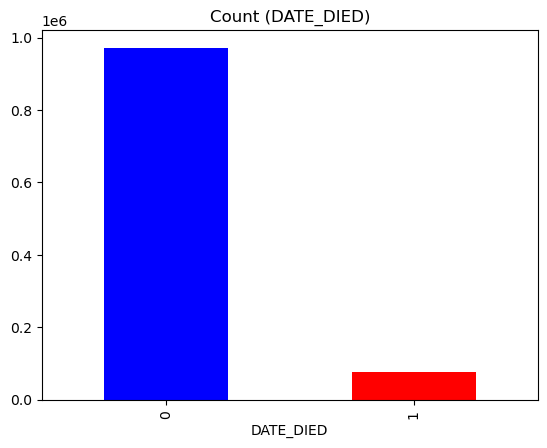

In [96]:
df['DATE_DIED'].value_counts().plot(kind='bar', title='Count (DATE_DIED)', color=['b', 'r'])

Thay feature 'DATE_DIED' bằng feature 'DEATH'

In [97]:
df['DEATH'] = df.DATE_DIED

In [98]:
df.drop(columns=['DATE_DIED'], inplace=True)

In [99]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEATH'],
      dtype='object')

In [100]:
df['SEX'].value_counts()

SEX
1    525064
2    523511
Name: count, dtype: int64

In [101]:
df['SEX'].replace({1:'Female', 2:'Male'}, inplace=True)

In [102]:
df.groupby(['SEX', 'PREGNANT'])['PREGNANT'].value_counts()  

SEX     PREGNANT
Female  1             8131
        2           513179
        98            3754
Male    97          523511
Name: count, dtype: int64

In [103]:
df.PREGNANT.replace({97:0, 98:np.nan}, inplace = True)

In [104]:
df.groupby(['SEX', 'PREGNANT'])['PREGNANT'].value_counts()  

SEX     PREGNANT
Female  1.0           8131
        2.0         513179
Male    0.0         523511
Name: count, dtype: int64

In [105]:
df['PREGNANT'].isnull().sum()

3754

In [106]:
df['PATIENT_TYPE'].value_counts()

PATIENT_TYPE
1    848544
2    200031
Name: count, dtype: int64

Thay đổi 2 về 0. 1 là có, 0 là không có 

In [107]:
df['USMER'].replace(2.0, 0, inplace=True)
df['SEX'].replace(2.0, 0, inplace=True)
df['PATIENT_TYPE'].replace(2.0, 0, inplace=True)
df['INTUBED'].replace(2.0, 0, inplace=True)
df['PNEUMONIA'].replace(2.0, 0, inplace=True)
df['PREGNANT'].replace(2.0, 0, inplace=True)
df['DIABETES'].replace(2.0, 0, inplace=True)
df['COPD'].replace(2.0, 0, inplace=True)
df['ASTHMA'].replace(2.0, 0, inplace=True)
df['INMSUPR'].replace(2.0, 0, inplace=True)
df['HIPERTENSION'].replace(2.0, 0, inplace=True)
df['OTHER_DISEASE'].replace(2.0, 0, inplace=True)
df['CARDIOVASCULAR'].replace(2.0, 0, inplace=True)
df['OBESITY'].replace(2.0, 0, inplace=True)
df['RENAL_CHRONIC'].replace(2.0, 0, inplace=True)
df['TOBACCO'].replace(2.0, 0, inplace=True)
df['ICU'].replace(2.0, 0, inplace=True)

Đổi giá trị của feature PATIENT_TYPE. 1 là hospitalized, 0 là not hospitalized

In [108]:
df['PATIENT_TYPE'].value_counts()

PATIENT_TYPE
1    848544
0    200031
Name: count, dtype: int64

In [109]:
df.PATIENT_TYPE.replace({1:'hospitaliezed', 0:'not hospitalized'}, inplace=True)

In [110]:
df['CLASIFFICATION_FINAL'].replace([1,2,3,4,5,6,7],
                                   ['patient was diagnosed with covid in different degrees.','patient was diagnosed with covid in different degrees.','patient was diagnosed with covid in different degrees.','the patient is not a carrier of covid or that the test is inconclusive.','the patient is not a carrier of covid or that the test is inconclusive.','the patient is not a carrier of covid or that the test is inconclusive.','the patient is not a carrier of covid or that the test is inconclusive.'],inplace=True)

In [111]:
df['CLASIFFICATION_FINAL'].value_counts()

CLASIFFICATION_FINAL
the patient is not a carrier of covid or that the test is inconclusive.    656596
patient was diagnosed with covid in different degrees.                     391979
Name: count, dtype: int64

In [112]:
df['PATIENT_TYPE'].value_counts()

PATIENT_TYPE
hospitaliezed       848544
not hospitalized    200031
Name: count, dtype: int64

Các giá trị 97, 98, 99 chuyển thành null

In [113]:
df['TOBACCO'].value_counts()

TOBACCO
0     960979
1      84376
98      3220
Name: count, dtype: int64

In [114]:
df.replace([97,98,99], np.nan, inplace=True)

Missing value

In [115]:
df.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                  3754
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
DEATH                        0
dtype: int64

Loại bỏ những feature có số lượng giá trị null lớn

In [116]:
df.drop(columns=["INTUBED", "ICU"], inplace=True)

Tiếp tục loại bỏ những dữ liệu null

In [117]:
df.dropna(inplace=True)

In [118]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
DEATH                   0
dtype: int64

## Encoding những dữ liệu dạng Object

In [119]:
df.describe(include=object)

,SEX,PATIENT_TYPE,CLASIFFICATION_FINAL
count,1021655,1021655,1021655
unique,2,2,2
top,Male,hospitaliezed,the patient is not a carrier of covid or that ...
freq,511795,830233,634185


In [120]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [121]:
cols = ['SEX', 'PATIENT_TYPE', 'CLASIFFICATION_FINAL']

df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1021655 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USMER                 1021655 non-null  int64  
 1   MEDICAL_UNIT          1021655 non-null  int64  
 2   SEX                   1021655 non-null  int32  
 3   PATIENT_TYPE          1021655 non-null  int32  
 4   PNEUMONIA             1021655 non-null  float64
 5   AGE                   1021655 non-null  float64
 6   PREGNANT              1021655 non-null  float64
 7   DIABETES              1021655 non-null  float64
 8   COPD                  1021655 non-null  float64
 9   ASTHMA                1021655 non-null  float64
 10  INMSUPR               1021655 non-null  float64
 11  HIPERTENSION          1021655 non-null  float64
 12  OTHER_DISEASE         1021655 non-null  float64
 13  CARDIOVASCULAR        1021655 non-null  float64
 14  OBESITY               1021655 non-null 

In [123]:
df.drop_duplicates(inplace=True)

In [124]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH
0,0,1,0,0,1.0,65.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1
1,0,1,1,0,1.0,72.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1
2,0,1,1,1,0.0,55.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,0,1,0,0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,0,1,1,0,0.0,68.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,1,13,1,0,0.0,47.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1048569,1,13,0,1,0.0,56.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1048571,1,13,1,1,0.0,51.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0
1048572,0,13,1,0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


## Trực quan hóa dữ liệu

In [125]:
df['SEX'].value_counts()

SEX
1    80892
0    72664
Name: count, dtype: int64

In [126]:
import plotly.graph_objects as go

labels = ['Female','Male']
values = [ 511795, 509860]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

Text(0.5, 1.0, 'AGE DISTRIBUTION')

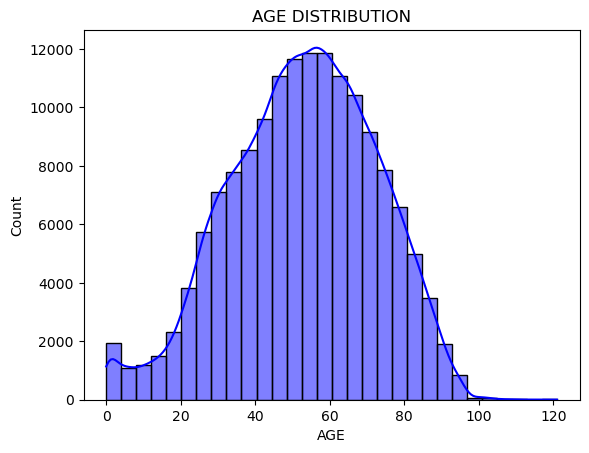

In [127]:
sns.histplot(df['AGE'], kde=True, color='b', bins=30)
plt.title('AGE DISTRIBUTION')

<Axes: xlabel='AGE', ylabel='Count'>

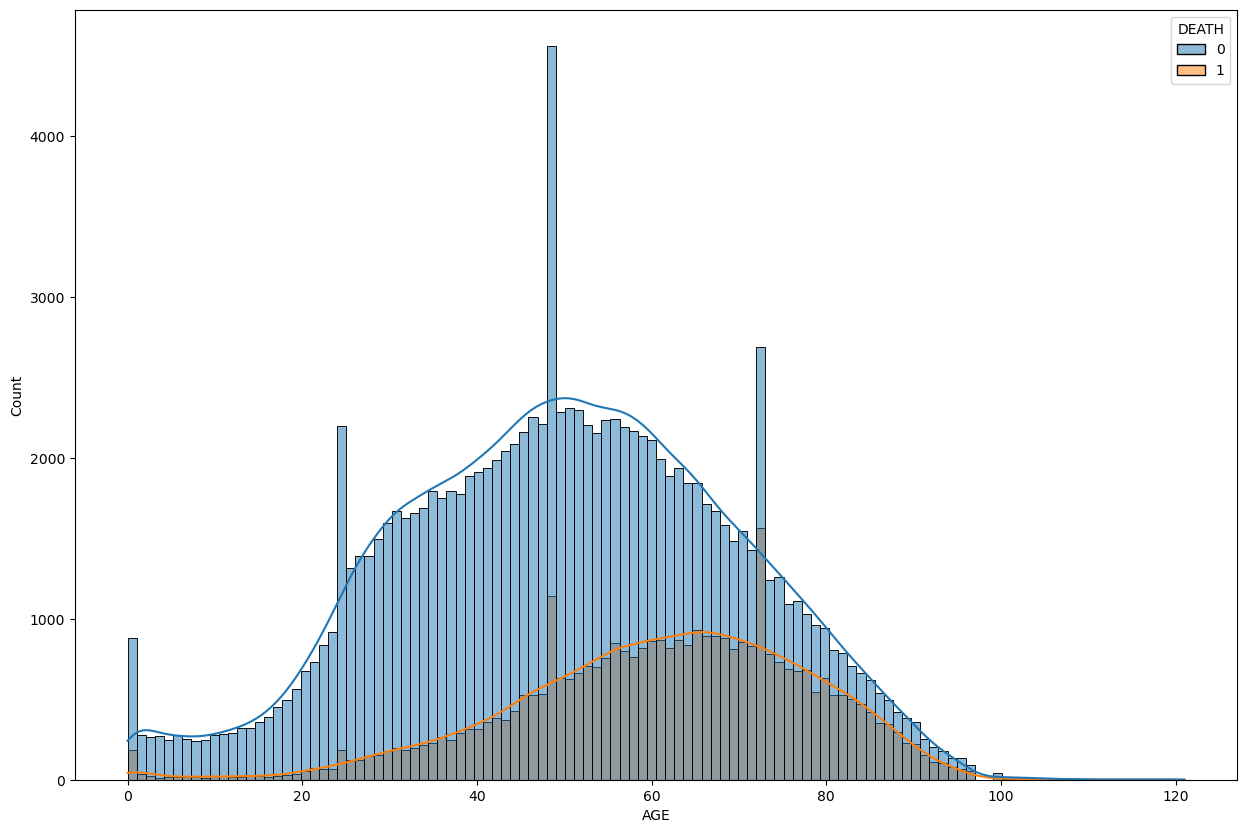

In [128]:
plt.figure(figsize = (15, 10))
sns.histplot(x = 'AGE', hue = 'DEATH', data = df , kde=True )

- Người cao tuổi có khả năng tử vong cao hơn người trẻ

In [129]:
df['DIABETES'].value_counts()

DIABETES
0.0    100452
1.0     53104
Name: count, dtype: int64

AttributeError: 'numpy.int64' object has no attribute 'startswith'

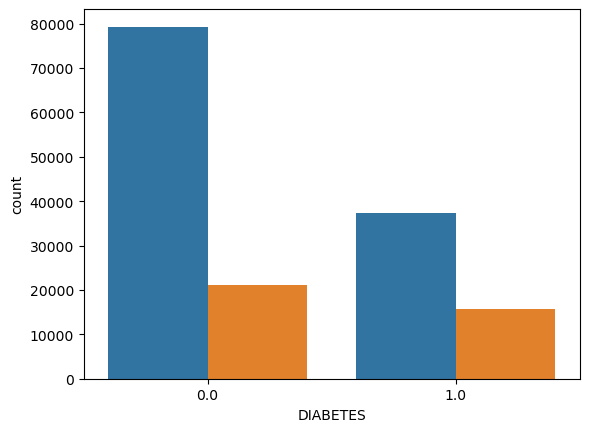

In [130]:
sns.countplot(data = df, x = "DIABETES", hue = "DEATH")

AttributeError: 'numpy.int64' object has no attribute 'startswith'

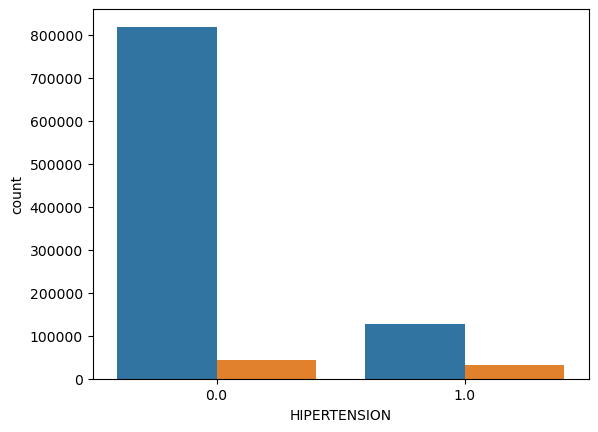

In [ ]:
sns.countplot(data=df, x="HIPERTENSION", hue="DEATH")

- Số người nhiễm virus Corona mắc bệnh tăng huyết áp có khả năng tử vong cao hơn so với những người không mắc bệnh tăng huyết áp.

AttributeError: 'numpy.int64' object has no attribute 'startswith'

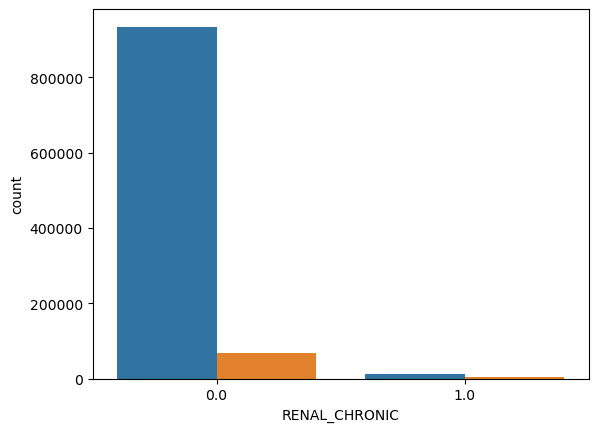

In [ ]:
sns.countplot(data=df, x="RENAL_CHRONIC", hue="DEATH")

## Make data ready for modeling

In [132]:
df['DEATH'].value_counts()

DEATH
0    116614
1     36942
Name: count, dtype: int64

- Dữ liệu đang bị mất cân bằng

In [133]:
# df['AGE'] = int(df['AGE'])

In [134]:
x=df.drop('DEATH',axis=1)
y=df['DEATH'].values

In [135]:
type(df['AGE'][0])  

numpy.float64

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=42)


scaler = MinMaxScaler()
scaler.fit(x_train[['AGE', 'MEDICAL_UNIT']])
x_train[['AGE', 'MEDICAL_UNIT']] = scaler.transform(x_train[['AGE', 'MEDICAL_UNIT']])
x_test[['AGE', 'MEDICAL_UNIT']] = scaler.transform(x_test[['AGE', 'MEDICAL_UNIT']])


In [137]:
x_train['AGE'].value_counts()

AGE
0.466667    2459
0.458333    2425
0.475000    2400
0.500000    2374
0.433333    2367
            ... 
1.000000       1
0.941667       1
0.991667       1
0.925000       1
0.966667       1
Name: count, Length: 117, dtype: int64

- Under sample

In [138]:
# from imblearn.under_sampling import RandomUnderSampler
# X_under, y_under = RandomUnderSampler().fit_resample(x,y)
# print(X_under.shape, y_under.shape)

## Train test split

## Modeling

In [139]:
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score , precision_score , recall_score , f1_score
def model_evaluation(model):
    model.fit(x_train, y_train)
    y_train_pre = model.predict(x_train)
    y_pred = model.predict(x_test)
    print('Train Accuracy:', accuracy_score(y_train, y_train_pre))
    print('Test Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('Confusion Matrix:', '\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:', '\n', classification_report(y_test, y_pred))

## Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
lr = LogisticRegression()
model_evaluation(lr)

Train Accuracy: 0.7767982156230666
Test Accuracy: 0.7828861682729877
Precision: 0.5712687402103379
Recall: 0.3494866529774127
F1 Score: 0.4336674027518261
Confusion Matrix: 
 [[21491  1916]
 [ 4752  2553]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87     23407
           1       0.57      0.35      0.43      7305

    accuracy                           0.78     30712
   macro avg       0.70      0.63      0.65     30712
weighted avg       0.76      0.78      0.76     30712



In [142]:
from sklearn.ensemble import HistGradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

 ## HistGradientBoostingClassifier

In [143]:
hgbc = HistGradientBoostingClassifier()
model_evaluation(hgbc)

Train Accuracy: 0.7893995636742536
Test Accuracy: 0.7891703568637666
Precision: 0.5903352198519809
Recall: 0.3712525667351129
F1 Score: 0.4558366249264644
Confusion Matrix: 
 [[21525  1882]
 [ 4593  2712]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87     23407
           1       0.59      0.37      0.46      7305

    accuracy                           0.79     30712
   macro avg       0.71      0.65      0.66     30712
weighted avg       0.77      0.79      0.77     30712



## BaggingClassifier

In [144]:
bc = BaggingClassifier(n_estimators=100)
model_evaluation(bc) 

Train Accuracy: 0.9138419458825828
Test Accuracy: 0.6822740296952331
Precision: 0.31492379658970876
Recall: 0.28569472963723475
F1 Score: 0.29959804766006315
Confusion Matrix: 
 [[18867  4540]
 [ 5218  2087]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.81      0.79     23407
           1       0.31      0.29      0.30      7305

    accuracy                           0.68     30712
   macro avg       0.55      0.55      0.55     30712
weighted avg       0.67      0.68      0.68     30712



## AdaBoostClassifier

In [145]:
adaboost = AdaBoostClassifier(learning_rate=0.2)
model_evaluation(adaboost)

Train Accuracy: 0.7786298069095764
Test Accuracy: 0.781030216202136
Precision: 0.5750906266183324
Recall: 0.30403832991101987
F1 Score: 0.39777917077102176
Confusion Matrix: 
 [[21766  1641]
 [ 5084  2221]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.93      0.87     23407
           1       0.58      0.30      0.40      7305

    accuracy                           0.78     30712
   macro avg       0.69      0.62      0.63     30712
weighted avg       0.75      0.78      0.75     30712



## Random forest

In [146]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
model_evaluation(rf)

Train Accuracy: 0.9138500862883006
Test Accuracy: 0.6790830945558739
Precision: 0.30343658498998305
Recall: 0.26954140999315535
F1 Score: 0.2854864433811802
Confusion Matrix: 
 [[18887  4520]
 [ 5336  1969]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.81      0.79     23407
           1       0.30      0.27      0.29      7305

    accuracy                           0.68     30712
   macro avg       0.54      0.54      0.54     30712
weighted avg       0.67      0.68      0.67     30712



In [147]:
# PCA
from sklearn.decomposition import PCA

# Khởi tạo PCA và chọn số lượng thành phần chính
pca = PCA(n_components=0.95)  # Giữ lại 95% phương sai
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001], 'kernel':['rbf']}

grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

grid_search.fit(x_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)   

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.777 total time=12.9min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.776 total time=13.6min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.777 total time=12.0min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.777 total time=14.9min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.775 total time=13.6min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.777 total time= 6.8min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.777 total time= 6.9min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.778 total time= 6.8min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.777 total time= 6.8min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.778 total time= 6.7min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.759 total time= 6.5min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

In [149]:
svm = SVC(C=100, gamma=0.01, kernel='rbf')
model_evaluation(svm)


Train Accuracy: 0.7824802188141057
Test Accuracy: 0.785458452722063
Precision: 0.6024027459954233
Recall: 0.28829568788501025
F1 Score: 0.3899638922322007
Confusion Matrix: 
 [[22017  1390]
 [ 5199  2106]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.94      0.87     23407
           1       0.60      0.29      0.39      7305

    accuracy                           0.79     30712
   macro avg       0.71      0.61      0.63     30712
weighted avg       0.76      0.79      0.76     30712

